In [6]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Users/markov/Dropbox/Research/OnGoing_Research/Snapshot/Python_experiment/source") 

In [7]:
import Discrete_Doucet_system
reload(Discrete_Doucet_system)


In [26]:
T0 = 4
Nx_obs = 3000
Nx_dat = 3000
theta_approx0 = np.array([-1.5, 0., 0., 0., 0.])
theta_approx = np.array([  9.78866872e-03, 4.99176141e-01, 2.49789192e+01, 5.98936442e+00, 0.2])
dsystem = Discrete_Doucet_system.Discrete_Doucet_system()
dsystem0 = Discrete_Doucet_system.Discrete_Doucet_system(theta = theta_approx0)
dsystem_approx = Discrete_Doucet_system.Discrete_Doucet_system(theta = theta_approx)
simul  = Discrete_Doucet_system.Simulate(T = T0) 
xobs,pobs = simul.simulate(dsystem, Nx = Nx_obs)
xdat, pdat= simul.simulate(dsystem_approx, Nx = Nx_dat)


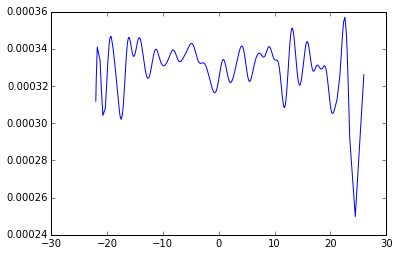

In [27]:
px = dsystem.compare(xdat, xobs) 

xdat_ordered = np.sort(xdat)
px_new_ordered = px[np.argsort(xdat)]

plt.plot(xdat_ordered, px_new_ordered)

In [39]:
Nx_test = 3000
xdat, pdat, A, B = simul.simulate(dsystem, Nx_test,  seed = 2, stat= True)
np.linalg.inv(A) * np.matrix(B).transpose()

matrix([[  1.53908744e-02],
        [  5.05257327e-01],
        [  2.49555384e+01],
        [  5.93840593e+00]])

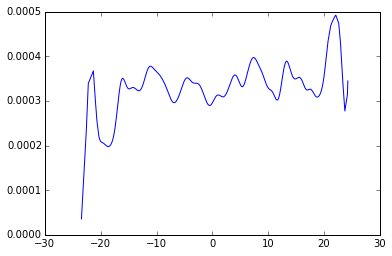

In [40]:
px = dsystem.compare(xdat, xobs) 
xdat_ordered = np.sort(xdat)
px_new_ordered = px[np.argsort(xdat)]
plt.plot(xdat_ordered, px_new_ordered)

In [53]:
xdat_old, pdat_old = simul.simulate(dsystem, Nx_test,  seed = 2)
xdat_new, pdat_new, A_new, B_new = simul.simulate(dsystem, Nx_test,  seed = 2, Px = px, stat= True)
np.linalg.inv(A_new) * np.matrix(B_new).transpose()

matrix([[  0.05876432],
        [  0.50355337],
        [ 24.95234046],
        [  5.8863383 ]])

In [54]:
xdat_old - xdat_new, pdat_old - pdat_new 

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

Set ALPHA and initial theta

In [103]:
alpha =  0.5
theta_approx_old = np.array([-1.5, 0, 0, 0.1, 0.2])
dsystem_old = Discrete_Doucet_system.Discrete_Doucet_system(theta = theta_approx_old)


Iteration 1. Simulate with initial parameters. First round does not require the stats

In [104]:
iter = 1
xdat_test, pdat_test= simul.simulate(dsystem_old, Nx_test,  seed = 2)
px = Nx_test * dsystem.compare(xdat_old, xobs) 
xdat_new, pdat_new, A_new, B_new = simul.simulate(dsystem_old, Nx_test,  seed = 2, Px = px, stat= True)


Sanity CHECK

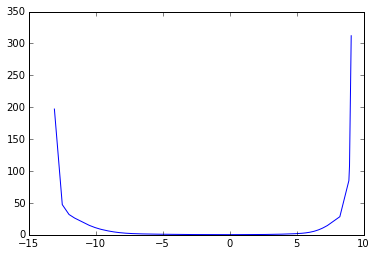

In [105]:
xdat_ordered = np.sort(xdat_old)
px_ordered = px[np.argsort(xdat_old)]
plt.plot(xdat_ordered, px_ordered)

In [106]:
xdat_new - xdat_test

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

Samples from Original distribution

In [107]:
xdat_old, pdat_old, A_old, B_old = simul.simulate(dsystem_old, Nx_test,  seed = 3, stat= True)

In [108]:
theta_new = np.linalg.inv(A_new + alpha*A_old) * np.matrix(B_new + alpha*B_old).transpose()

In [148]:
np.array(theta_new.transpose().tolist()[0] + [0.2])

array([-1.37950045, -0.02735133, -0.22740629, -0.09308106,  0.2       ])

In [153]:
alpha = 1.5
theta_approx = np.array([-1.5, 0, 0, 0.1, 0.2])
for iter in range(0,100):
        print theta_approx
        dsystem_old = Discrete_Doucet_system.Discrete_Doucet_system(theta = theta_approx)
        xdat_test, pdat_test= simul.simulate(dsystem_old, Nx_test,  seed = iter*2)
        px = Nx_test * dsystem.compare(xdat_old, xobs) 
        xdat_new, pdat_new, A_new, B_new = simul.simulate(dsystem_old, Nx_test,  seed = iter*2, Px = px, stat= True)
        xdat_old, pdat_old, A_old, B_old = simul.simulate(dsystem_old, Nx_test,  seed = iter*2+1, stat= True)
        theta_approx = np.array(np.linalg.inv(A_new + alpha*A_old) * np.matrix(B_new + alpha*B_old).transpose())
        theta_approx = np.array(theta_approx.transpose().tolist()[0] + [0.2])

[-1.5  0.   0.   0.1  0.2]
[ -1.40916682e+00  -1.39918848e-03  -2.14669301e-02  -6.39769032e-02
   2.00000000e-01]
[-1.35539636  0.01540772 -0.36777388 -0.17732693  0.2       ]
[-1.04486451  0.0554074  -0.61727598 -0.48314572  0.2       ]
[ 0.98239627  0.24402125 -1.31682879 -2.58616374  0.2       ]
[ 1.51131929  0.20695405 -0.77273393 -3.22428848  0.2       ]
[ 1.42371367  0.18953031 -0.42812614 -3.18855833  0.2       ]
[  1.21321365e+00   1.33599349e-01   1.59449860e-03  -2.90799483e+00
   2.00000000e-01]
[ 1.40910936  0.17146688 -0.27673246 -3.16739962  0.2       ]
[ 1.28709161  0.1456055  -0.1215366  -3.04139186  0.2       ]
[ 0.81217713  0.12190302 -0.4831398  -2.58252119  0.2       ]
[ 0.69072368  0.08961549 -0.03913909 -2.3157339   0.2       ]
[ 0.82846102  0.08883364  0.00726206 -2.63466435  0.2       ]
[ 0.99221683  0.0917858  -0.03236252 -2.81843956  0.2       ]
[ 0.35286499  0.05733601  0.41918321 -2.22201664  0.2       ]
[ 0.52855921  0.07800163  0.3632205  -2.27897428  0.2

KeyboardInterrupt: 